In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# SIIM-ACR Pneumothorax Segmentation.

## Data loader.

### Training set.

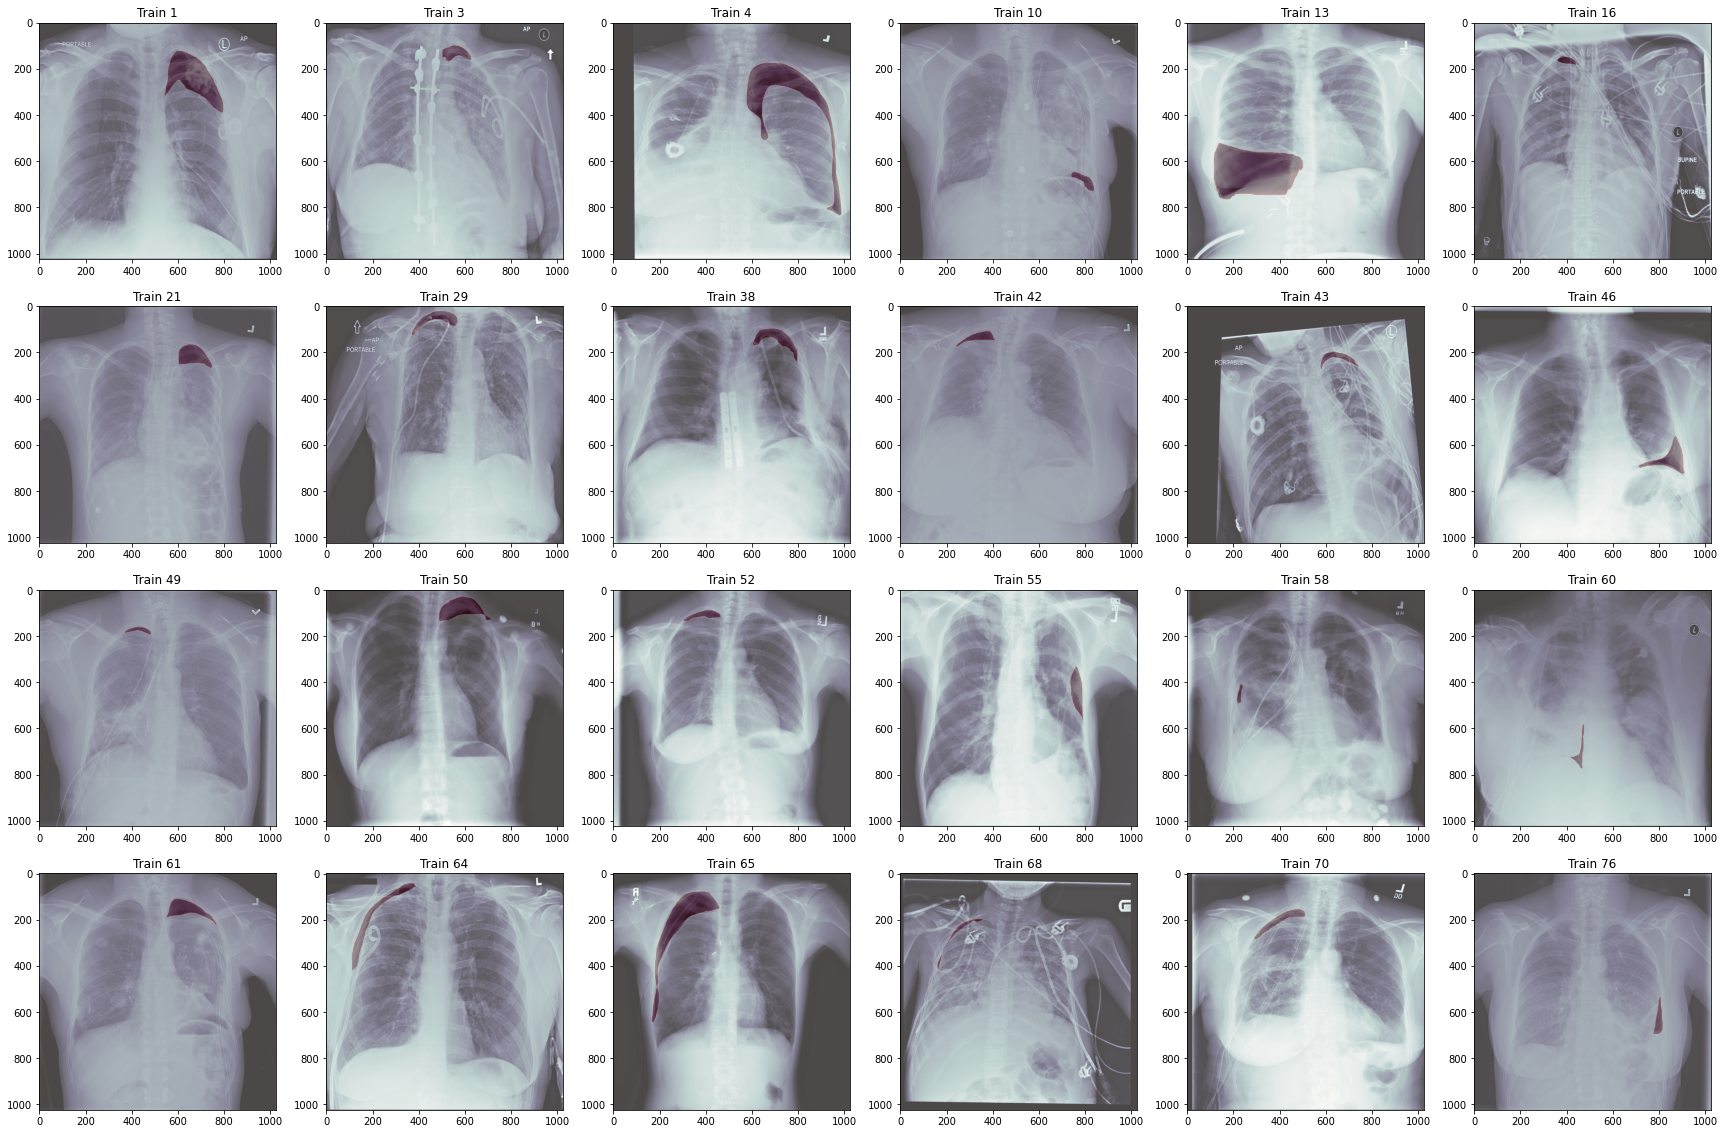

In [210]:
from pydicom import dcmread
from torch.utils.data import Dataset
from lib.mask_functions import rle2mask

class TrainingSet(Dataset):
    
    def __init__(self):
        
        self.df = pd.read_csv('./dataset/train.csv')
        
    def __getitem__(self, idx):
        
        imageId, rle = self.df['ImageId'][idx], self.df['EncodedPixels'][idx]
        
        dcm = dcmread('./dataset/dicom-images-train/{}.dcm'.format(imageId))
        
        image, height, width = dcm.pixel_array, dcm.Rows, dcm.Columns
        
        mask = rle2mask(rle, width, height).T if rle != '-1' else np.zeros(width * height).reshape(width, height)
        
        return (image / 255), (mask / 255)
        
    def __len__(self):
        
        return len(self.df)

def training_samples(n = 4, m = 6):
    
    fig, axes = plt.subplots(n, m, figsize = (m * 5, n * 5))
    
    idx = 0
    
    for id, (image, mask) in enumerate(TrainingSet()):
        
        if mask.max() > 0:
    
            axes[(idx // m), (idx % m)].set_title('Train {}'.format(id))
        
            axes[(idx // m), (idx % m)].imshow(image, cmap = plt.cm.bone)
            axes[(idx // m), (idx % m)].imshow(mask, alpha = 0.3, cmap = 'Reds')
            
            idx = idx + 1
            
            if idx == n * m:
                break

training_samples()

### Test set.

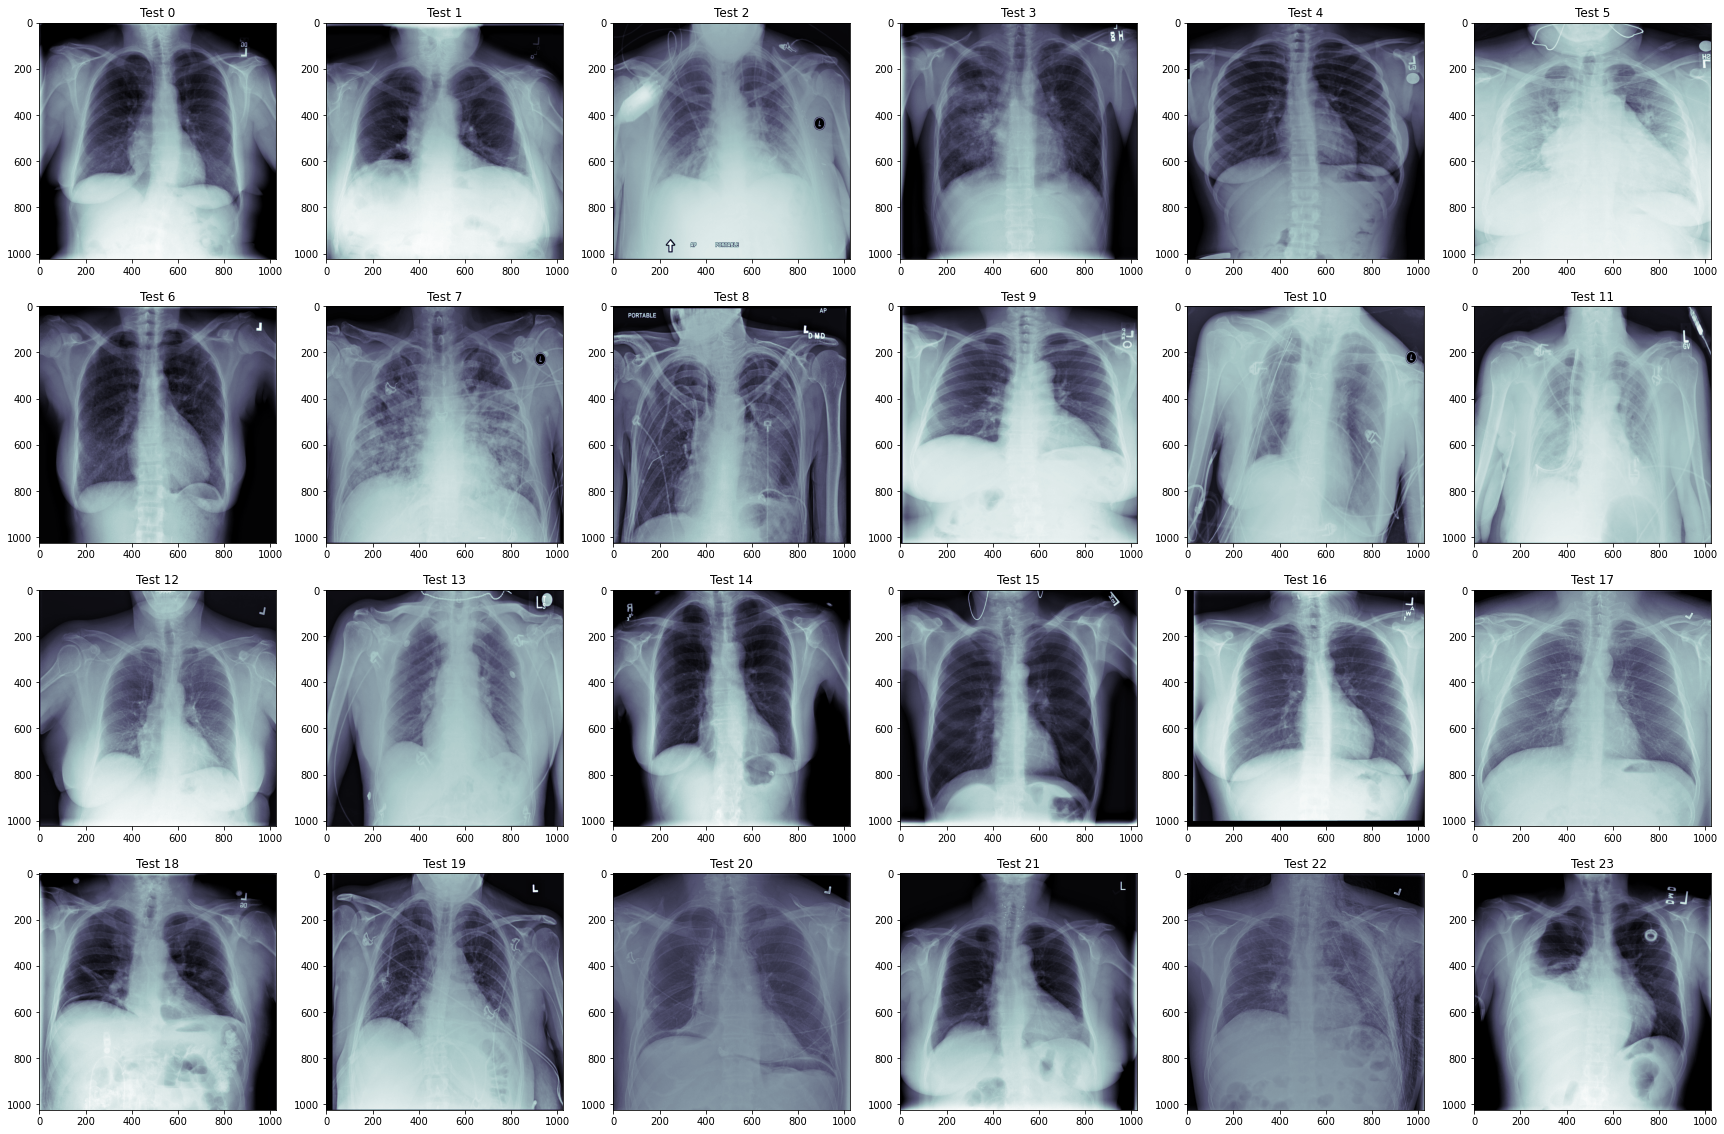

In [209]:
class TestSet(Dataset):
    
    def __init__(self):
        
        self.df = pd.read_csv('./dataset/test.csv')
        
    def __getitem__(self, idx):
        
        imageId = self.df['ImageId'][idx]
        
        dcm = dcmread('./dataset/dicom-images-test/{}.dcm'.format(imageId))
        
        image = dcm.pixel_array
        
        return image / 255
        
    def __len__(self):
        
        return len(self.df)
    
def test_samples(n = 4, m = 6):
    
    fig, axes = plt.subplots(n, m, figsize = (m * 5, n * 5))
    
    for idx, image in enumerate(TestSet()):
    
        axes[(idx // m), (idx % m)].set_title('Test {}'.format(idx))
        axes[(idx // m), (idx % m)].imshow(image, cmap = plt.cm.bone)
        
        if idx == (n * m - 1):
            break

test_samples()